In [47]:
__author__ = "Neelabh Pant"
## Date: 06/14/2017

# Project Description

A Lot of people leaving the company recently and we would like to understand why that's happening. We have historical data on employees and in this project we would like to build a model that is able to predict which employee will leave next. We have built a model that is better than random guessing. Here in this project we also prefer false negatives than false positives. Fields in the dataset include:
* Employee satisfaction level
* Last evaluation
* Number of projects
* Average monthly hours
* Time spent at the company
* Whether they have had a work accident
* Whether they have had a promotion in the last 5 years
* Department
* Salary
* Whether the employee has left

The goal of this project is to predict the binary outcome variable "left" using the rest of the data. Since the outcome is binary, this is a classification problem.

This dataset comes from (https://www.kaggle.com/ludobenistant/hr-analytics/) and is released under CC BY-SA 4.0 License.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [50]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [51]:
df = pd.read_csv('/Users/neelabhpant/Documents/Deep Learning/zero_to_deep_learning_udemy/data/HR_comma_sep.csv')
df_toplot = df.copy()
df_tocopy=df_toplot.drop(['salary', 'sales'], axis=1)

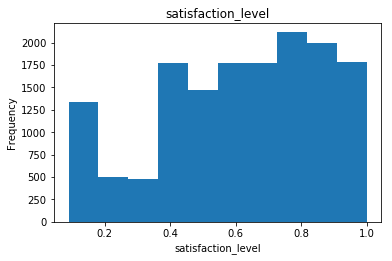

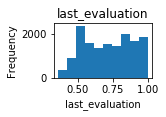

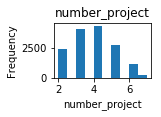

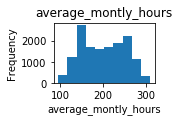

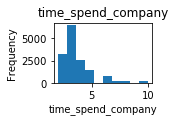

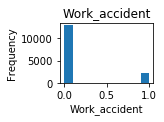

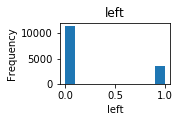

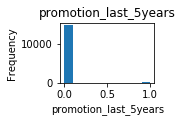

In [52]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df_tocopy.columns):
    plt.subplot(3, 3, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

# Cleaning data

In [8]:
df['monthly_hours_norm'] = df['average_montly_hours']/df['average_montly_hours'].max()
y = df['left'].as_matrix()
y_1 = to_categorical(df['left'])
Work_accident_categorical = to_categorical(df['Work_accident'])
promotion_last_5years_categorical = to_categorical(df['promotion_last_5years'])

positions=np.zeros((df.sales.shape[0], 1))
for idx,name in enumerate(df.sales):
    if name=='sales':
        positions[idx,0]=0
    elif name=='accounting':
        positions[idx,0]=1
    elif name=='hr':
        positions[idx,0]=2
    elif name=='technical':
        positions[idx,0]=3
    elif name=='support':
        positions[idx,0]=4
    elif name=='management':
        positions[idx,0]=5
    elif name=='IT':
        positions[idx,0]=6
    elif name=='product_mng':
        positions[idx,0]=7
    elif name=='marketing':
        positions[idx,0]=8
    else:
        positions[idx,0]=9
        
#df_positions = pd.DataFrame(data=positions, columns=['positions'])
categorical_positions = to_categorical(positions)

monthly_salary=np.zeros((df.salary.shape[0], 1))
for idx,name in enumerate(df.salary):
    if name=='low':
        monthly_salary[idx,0]=0
    elif name=='medium':
        monthly_salary[idx,0]=1
    else:
        monthly_salary[idx,0]=2

categorical_salary = to_categorical(monthly_salary)

df = df[['satisfaction_level', 'last_evaluation', 'number_project',
         'time_spend_company', 'monthly_hours_norm']]

df['No Accident'] = Work_accident_categorical[:,0]
df['Accident'] = Work_accident_categorical[:,1]
df['No promotion'] = promotion_last_5years_categorical[:,0]
df['Promotion'] = promotion_last_5years_categorical[:,1]
df['sales'] = categorical_positions[:,0]
df['accounting'] = categorical_positions[:,1]
df['hr'] = categorical_positions[:,2]
df['technical'] = categorical_positions[:,3]
df['support'] = categorical_positions[:,4]
df['management'] = categorical_positions[:,5]
df['IT'] = categorical_positions[:,6]
df['product_mng'] = categorical_positions[:,7]
df['marketing'] = categorical_positions[:,8]
df['random'] = categorical_positions[:,9]
df['low_salary'] = categorical_salary[:,0]
df['medium_salary'] = categorical_salary[:,1]
df['high_salary'] = categorical_salary[:,2]

In [14]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'monthly_hours_norm', 'No Accident', 'Accident',
       'No promotion', 'Promotion', 'sales', 'accounting', 'hr', 'technical',
       'support', 'management', 'IT', 'product_mng', 'marketing', 'random',
       'low_salary', 'medium_salary', 'high_salary']].as_matrix()

# Dividing data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Intializing and Training Logistic Regression model using Keras

In [18]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40, verbose=0)

# Predicting outcomes using trained model

In [20]:
y_train_pred = model.predict(X_train)
y_train_class_pred = y_train_pred > 0.5

y_test_pred = model.predict(X_test)
y_test_class_pred = y_test_pred > 0.5

# Accuracy check

In [21]:
from sklearn.metrics import accuracy_score
print("The training accuracy score is {:0.3f}".format(accuracy_score(y_train, y_train_class_pred)))
print("The testing accuracy score is {:0.3f}".format(accuracy_score(y_test, y_test_class_pred)))

The training accuracy score is 0.956
The testing accuracy score is 0.950


# Confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ["Predicted "+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

print("Training Data Confusion Matrix :\n\n",pretty_confusion_matrix(y_train, y_train_class_pred, ['Left', "Not Left"]))
print("\n")
print("Testing Data Confusion Matrix :\n\n",pretty_confusion_matrix(y_test, y_test_class_pred, ['Left', "Not Left"]))

Training Data Confusion Matrix :

           Predicted Left  Predicted Not Left
Left                8901                 253
Not Left             269                2576


Testing Data Confusion Matrix :

           Predicted Left  Predicted Not Left
Left                2203                  71
Not Left              79                 647


# Precision, Recall and R-2 score

In [40]:
from sklearn.metrics import r2_score
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.792
The R2 score on the Test set is:	0.762


# K-fold cross validation

In [45]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, KFold

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(10, input_shape=(X_train.shape[1],), activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(Adam(lr=0.1),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cv)
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.9422 ± 0.0188


The 5-Fold Cross Validation accuracy was almost equal to the Accuracy . 
Hence we can assume the model is doing good even when the data is shuffled and presented training and testing data in K-Folds

-Neelabh Pant